In [1]:
import streamlit as st
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
@st.cache_data
def load_data():
    df = pd.read_csv(
        r"C:\Users\emych\Desktop\Forcasting\ercot_load-temp_hr_2024.csv",
        skiprows=3,
        sep=",",
        encoding="utf-8-sig"
    )
    df = df[['UTC Timestamp (Interval Ending)', 'TOTAL Actual Load (MW)']].copy()
    df.columns = ['ds', 'y']
    df['ds'] = pd.to_datetime(df['ds'])
    return df

def train_model(df):
    model = Prophet()
    model.fit(df)
    return model

def forecast_load(model, periods=24*7, freq='H'):
    future = model.make_future_dataframe(periods=periods, freq=freq)
    forecast = model.predict(future)
    return forecast

def plot_forecast(model, forecast):
    fig = model.plot(forecast)
    plt.xlabel("Date")
    plt.ylabel("Load (MW)")
    return fig

2025-05-30 20:51:14.552 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


2025-05-30 20:51:15.713 
  command:

    streamlit run C:\Users\emych\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-30 20:51:15.716 No runtime found, using MemoryCacheStorageManager
20:51:17 - cmdstanpy - INFO - Chain [1] start processing
20:51:22 - cmdstanpy - INFO - Chain [1] done processing


DeltaGenerator()

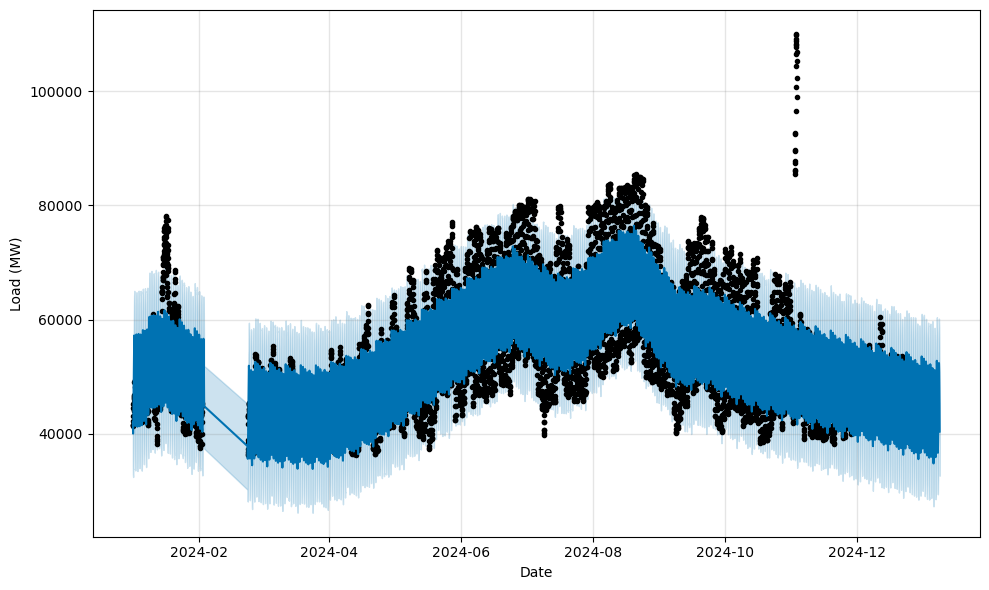

In [3]:
# Streamlit UI
st.title("ERCOT Hourly Load Forecast")

df = load_data()
st.write("### Historical Data Sample")
st.dataframe(df.head())

model = train_model(df)

periods = st.slider("Forecast Horizon (hours)", min_value=24, max_value=24*30, step=24, value=24*7)
forecast = forecast_load(model, periods=periods)

st.write(f"### Forecast for next {periods} hours")
fig = plot_forecast(model, forecast)
st.pyplot(fig)